## Computes ideal synchronization of IMU and video data records by estimating the RMSE of shifted signals (_.mot_ and _.csv_), and writes this info into `infoToSync.csv`.


In [1]:
import os
import sys

# Add the parent directory of the current working directory to the Python path
# This allows importing shared utility functions from the `utils/` folder
sys.path.append(os.path.dirname(os.getcwd())) #Add project dir to path
from utils.syncUtilities import plotFramesShiftToSyncrhonizeAllSubjectsOneActivity,getMainJointFromMotAndMainBonesFromCSV, getSamplesToSynchronize, SynchronizeAndCutSignals

In [2]:
# Import custom synchronisation utilities
import utils.fileProcessing as fileutil 
import utils.plotUtilities as plotutil
import utils.signalProcessing as signalutil

Set dataset root path

In [3]:
# Set dataset root directory 
fulldatasetpath = r"D:/Machine Learning/Video_IMU data/Data"

In [4]:
inpath = os.path.join(fulldatasetpath,'dataset','videoandimus')
outpath = os.path.join(fulldatasetpath,'analysis','videoandimusync')
if not os.path.exists(outpath):
    os.makedirs(outpath)

### 1. Synchronization in loop for a list of subjects and activities

In [5]:
# Define activity categories 
lower_activities = ["A01","A02","A03","A04"]
upper_activities = ["A05","A06","A07","A08","A09","A10","A11","A12","A13"]
dataset_activities = lower_activities + upper_activities

# Activity labels (for legend use)
activities_legend = ["walk_forward", "walk_backward", "walk_along","sit_to_stand",
"move_right_arm","move_left_arm","drink_right_arm","drink_left_arm", "assemble_both_arms","throw_both_arms",
"reachup_right_arm","reachup_left_arm","tear_both_arms"]

In [ ]:

subjects = ["S40","S41","S42","S44","S46","S47","S48","S49",
            "S50","S51","S52","S53","S54","S55","S56","S57"]

In [7]:
# --- Synchronisation Parameters ---

RMSE_SAMPLES = 180     # Number of samples (time steps) to consider when calculating RMSE
                       # This defines the window over which alignment error is measured

FINAL_LENGTH = 180     # Length to which signals will be trimmed after synchronisation
                       # Ensures consistent input length for downstream analysis

MAX_SYNC_OVERLAP = 15  # Maximum number of frames to shift for estimating synchronisation
                       # Limits search space to ±15 frames when aligning IMU and video signals


Activity: A01


d:\Machine Learning\Video_IMU data\vidimu-tools\utils\syncUtilities.py:182: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfchanges = pd.concat([dfchanges,entry],ignore_index=True)


Not found
Not found


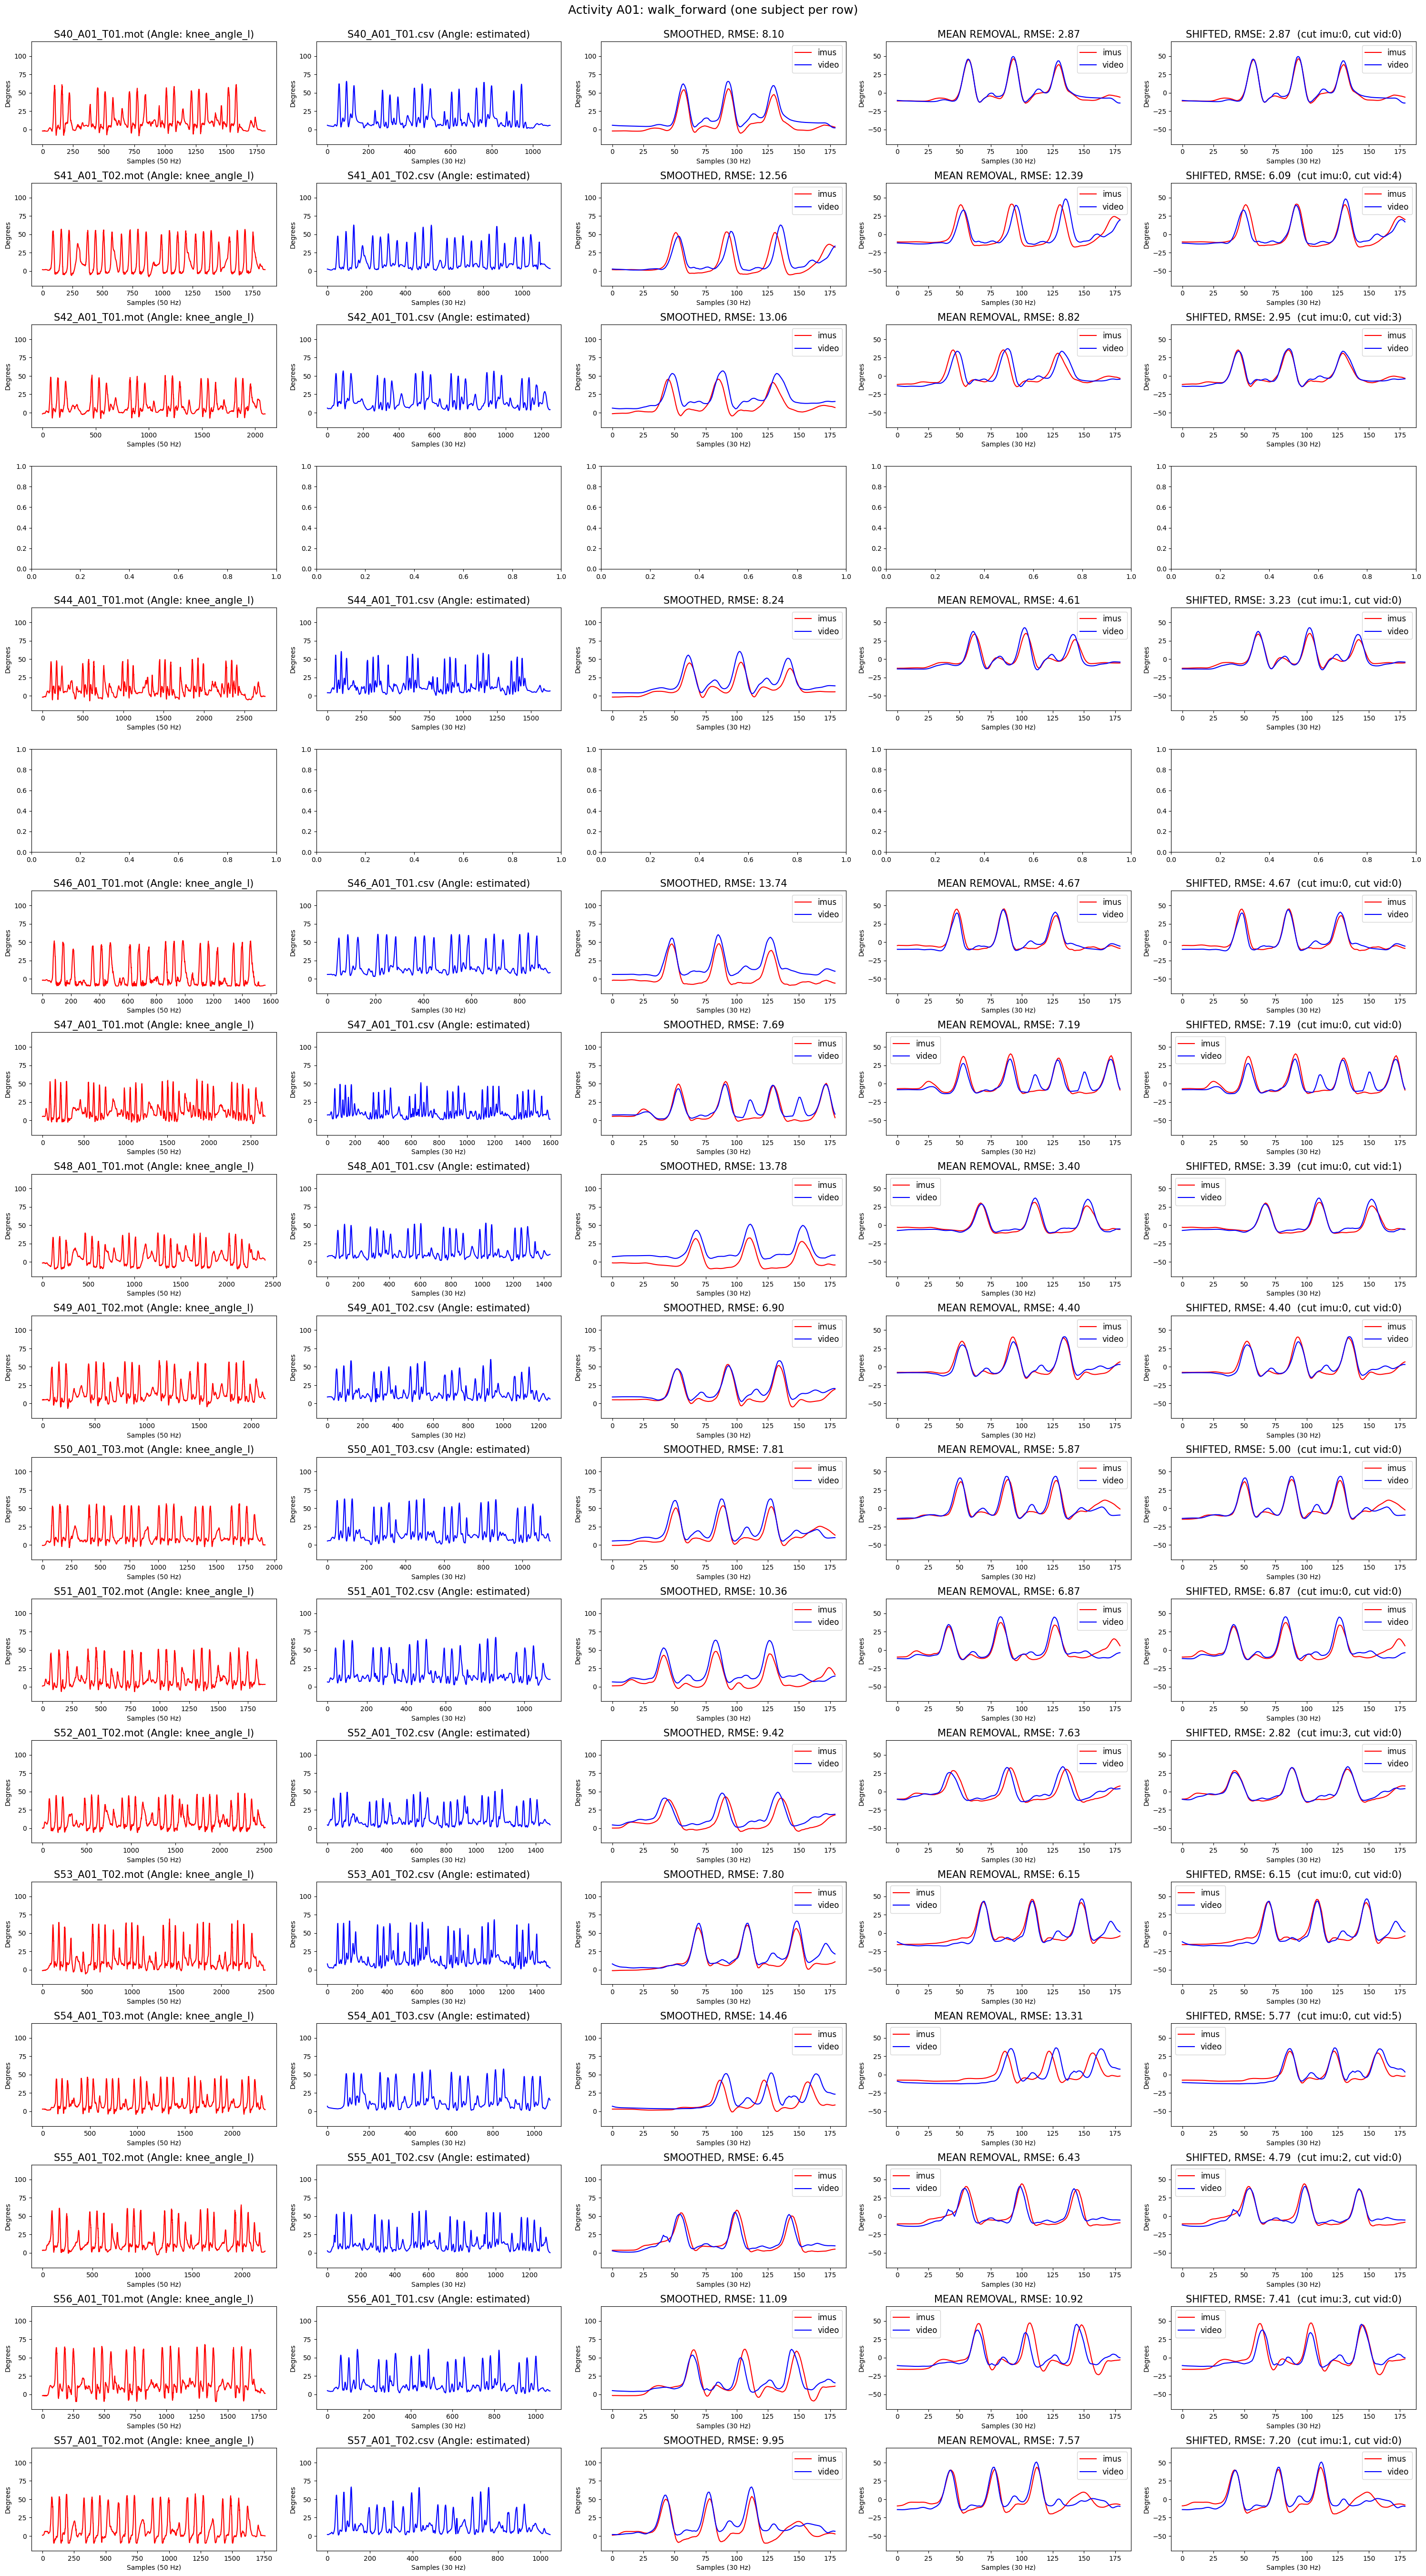

Activity: A02
Not found
Not found


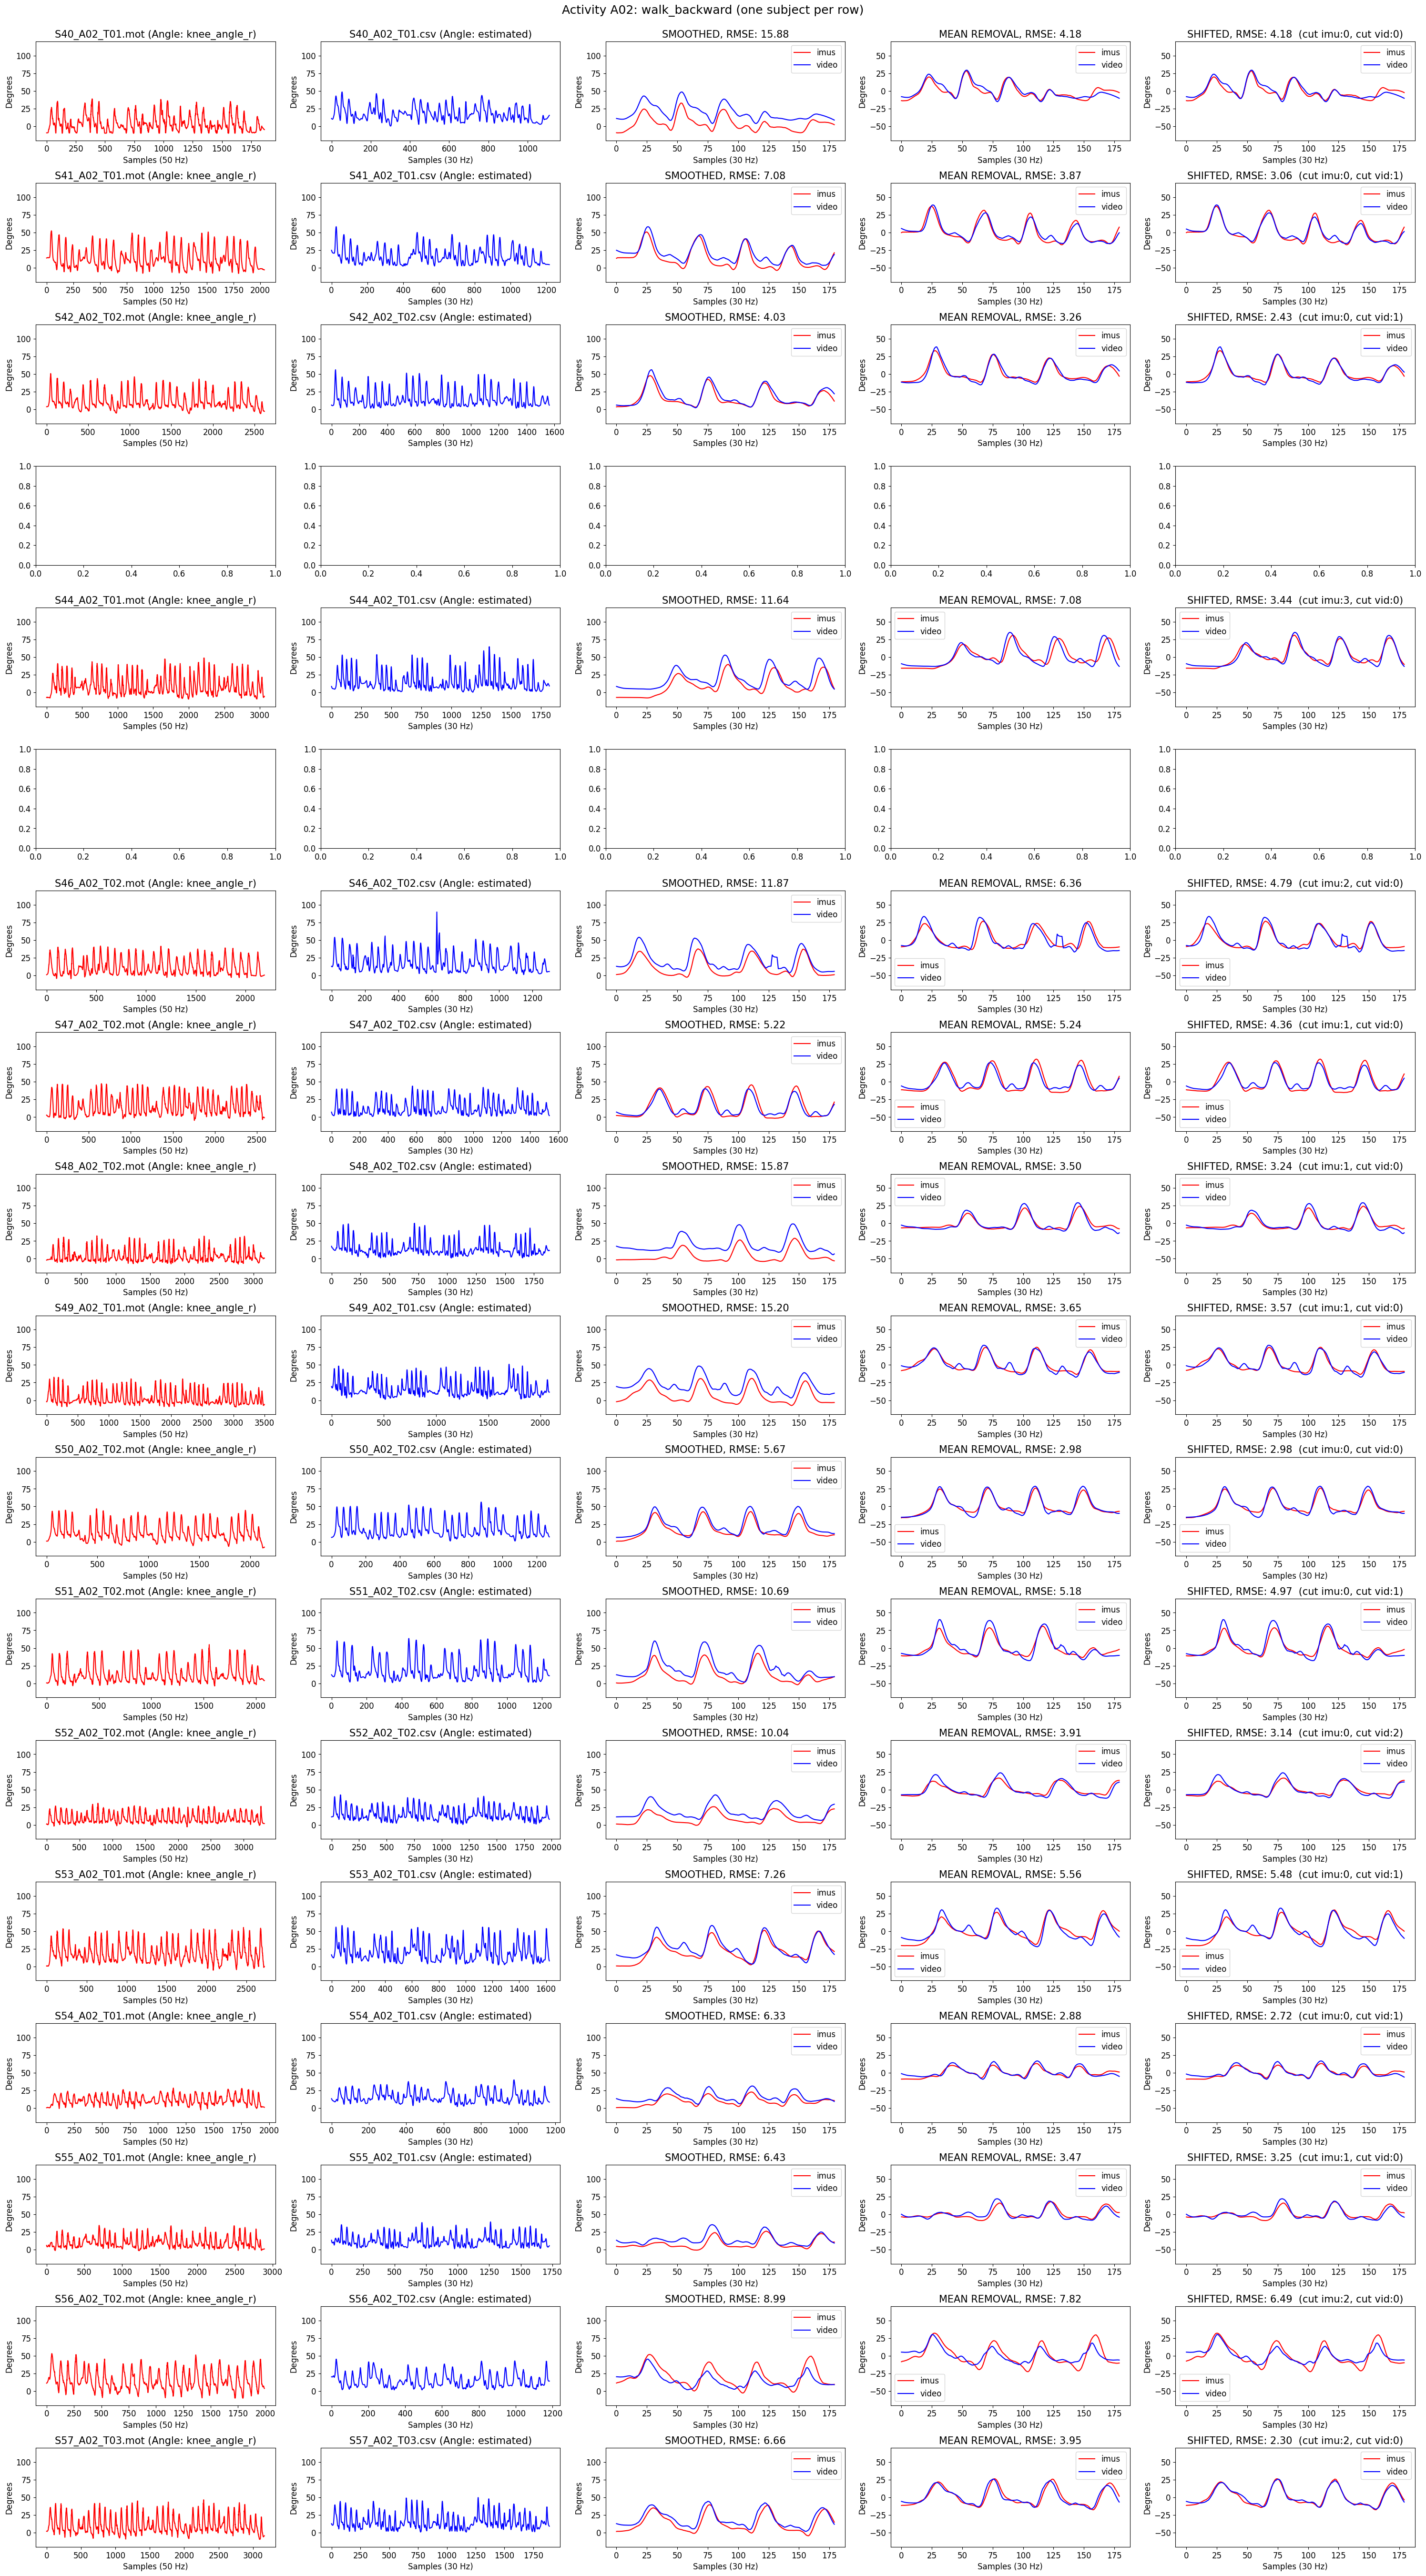

Activity: A03
Not found
Not found


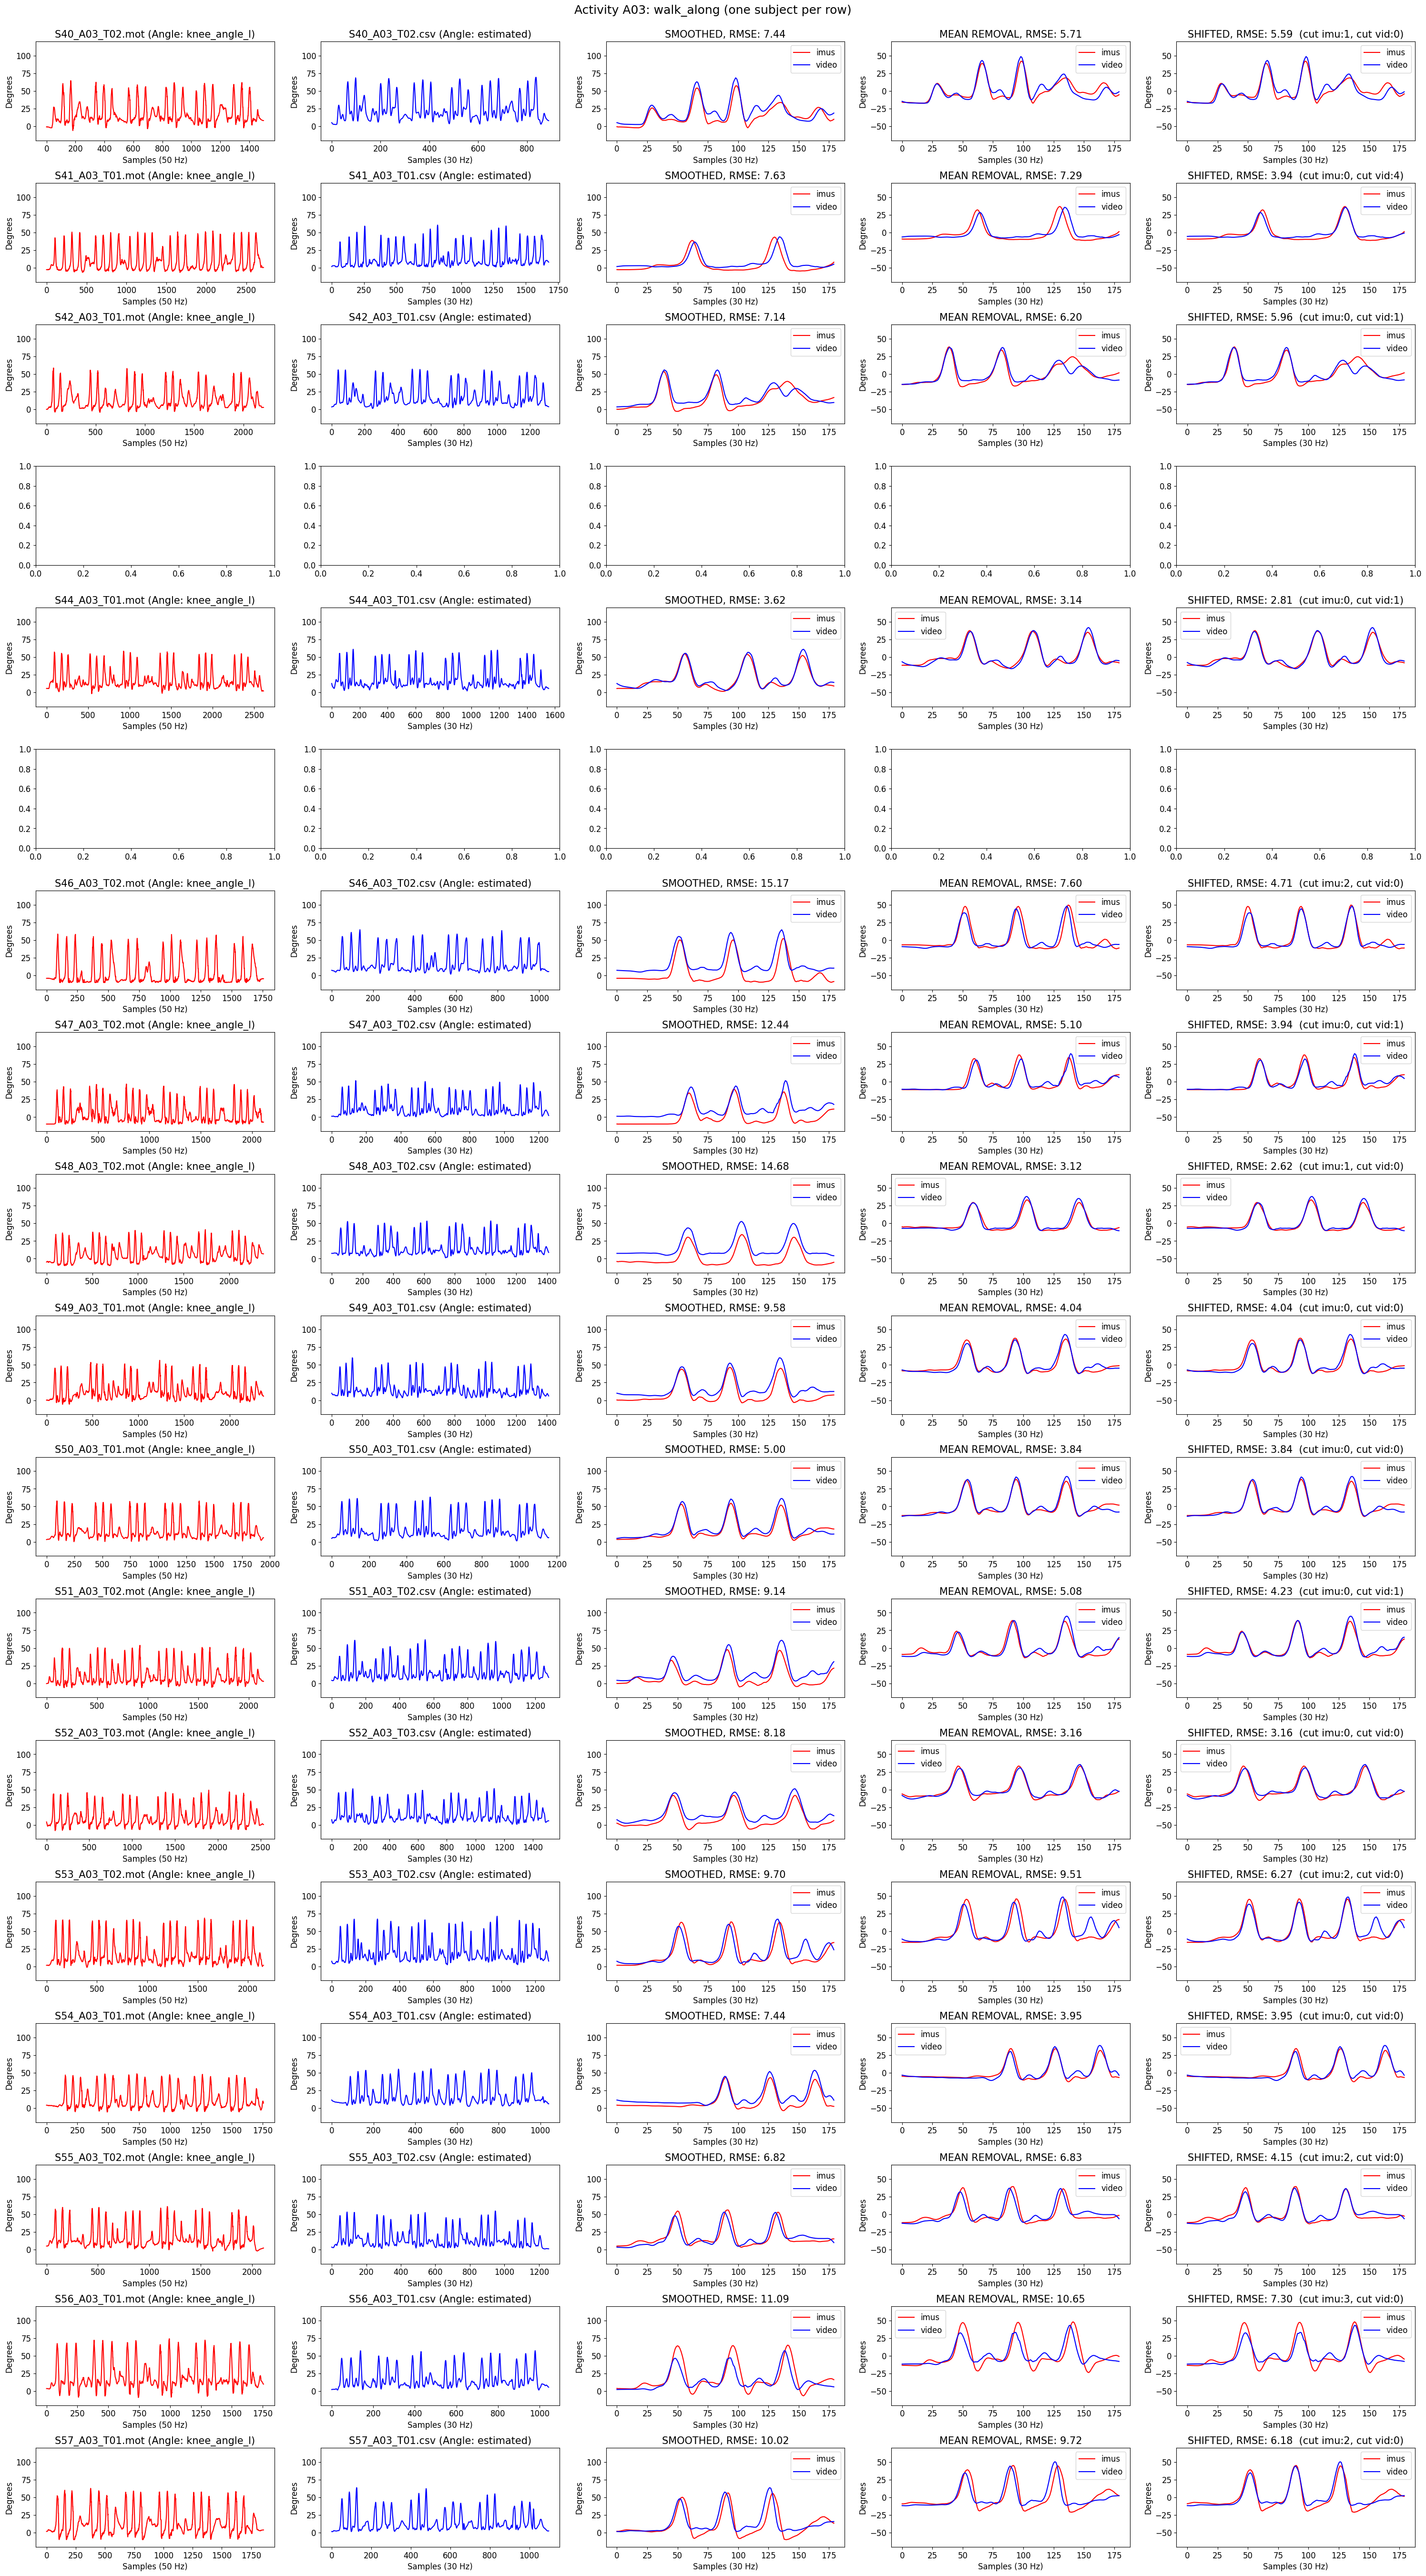

Activity: A04
Not found
Not found


KeyboardInterrupt: 

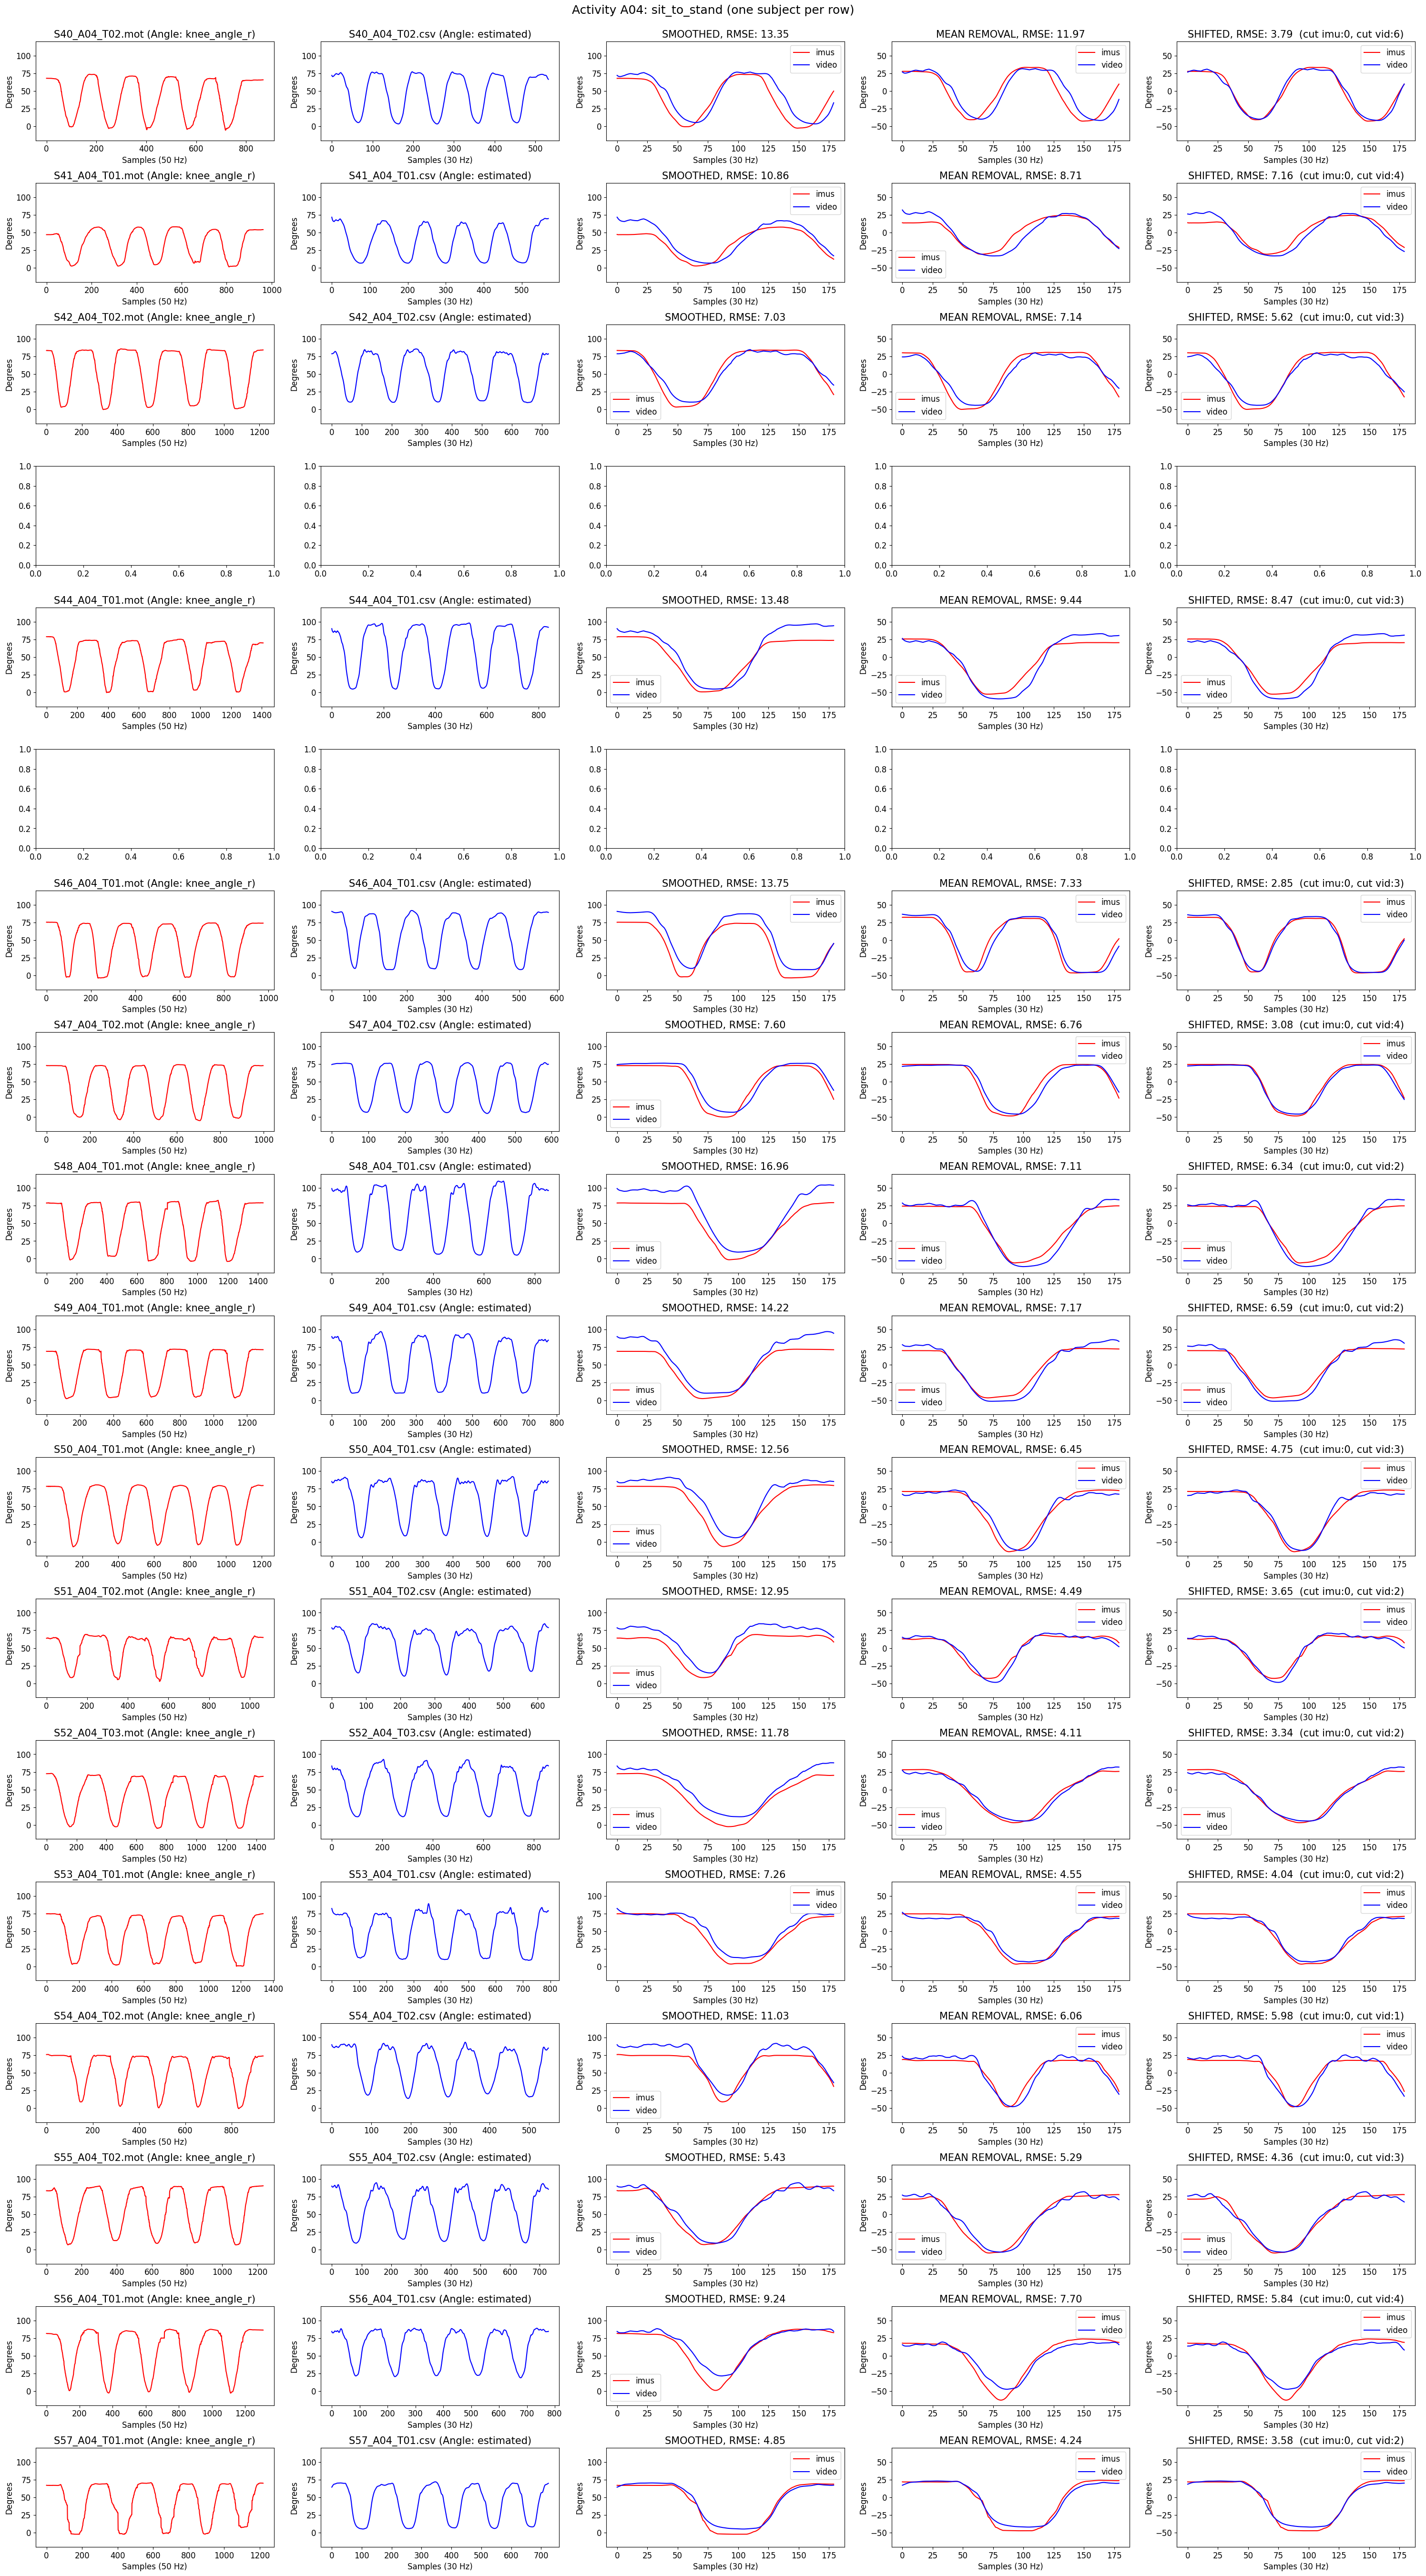

In [8]:

# --- Initialise storage for RMSE results ---
rmse_lists = []         # Stores RMSE alignment results for each activity
index_activity = 0      # Tracks the index of the current activity (not actively used here)

# --- Define log file path and ensure it's clean ---
csvlog = 'infoToSync.csv'                                 # Filename for the synchronisation info log
csvlogfile = os.path.join(outpath, csvlog)                # Full path to the CSV log file

if os.path.exists(csvlogfile):
    os.remove(csvlogfile)                                 # Delete existing log file to avoid appending to old data

# --- Loop through all activities and synchronise joint data ---
for activity, legend in zip(dataset_activities, activities_legend):
    print("Activity: " + activity)

    # Estimate optimal frame alignment between video and IMU for all subjects for this activity
    rmse_list = plotFramesShiftToSyncrhonizeAllSubjectsOneActivity(csvlog,inpath,outpath,subjects,activity,legend,activity+"_("+legend+")_synchronize",RMSE_SAMPLES=RMSE_SAMPLES,MAX_SYNC_OVERLAP=MAX_SYNC_OVERLAP,FINAL_LENGTH=FINAL_LENGTH)